In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,LSTM 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("datasets/GOOG.csv",parse_dates=["Date"],index_col=[0])
df=df.iloc[:,:-1]
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086
...,...,...,...,...,...
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039
2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922
2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980


In [4]:
df.shape

(4476, 5)

In [5]:
test_split=round(len(df)*0.20)
print(test_split)


895


In [6]:
df_for_training=df[:-895]
df_for_testing=df[-895:]
print(df_for_training.shape)
print(df_for_testing.shape)

(3581, 5)
(895, 5)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        1.34908021e-04],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        3.39307537e-03],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        3.83867225e-03],
       ...,
       [8.38513750e-01, 8.43922922e-01, 8.38156069e-01, 8.27215513e-01,
        8.27215513e-01],
       [8.23181293e-01, 8.23889563e-01, 8.10375965e-01, 8.12689536e-01,
        8.12689536e-01],
       [8.10476525e-01, 8.28692499e-01, 8.24386693e-01, 8.25590596e-01,
        8.25590596e-01]])

In [8]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,60)
testX,testY=createXY(df_for_testing_scaled,60)

In [9]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (3521, 60, 5)
trainY Shape--  (3521,)


In [10]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[3.30298164e-04 9.44785459e-04 0.00000000e+00 1.34908021e-04
  1.34908021e-04]
 [7.42148227e-04 2.98909923e-03 1.88269054e-03 3.39307537e-03
  3.39307537e-03]
 [4.71386886e-03 4.78092896e-03 5.42828241e-03 3.83867225e-03
  3.83867225e-03]
 [4.91367646e-03 4.01532941e-03 3.15578542e-03 1.98679178e-03
  1.98679178e-03]
 [2.35285614e-03 2.54928676e-03 3.28434064e-03 2.44873974e-03
  2.44873974e-03]
 [2.34877785e-03 2.52892558e-03 3.60779701e-03 3.22955376e-03
  3.22955376e-03]
 [3.63326671e-03 2.80177162e-03 4.03492722e-03 2.51005881e-03
  2.51005881e-03]
 [2.48334262e-03 1.52712947e-03 2.50886935e-03 8.17608079e-04
  8.17608079e-04]
 [1.26817570e-03 8.02253103e-04 2.57107531e-03 9.64778600e-04
  9.64778600e-04]
 [1.43128522e-03 5.00900100e-04 1.53849690e-03 9.81131336e-05
  9.81131336e-05]
 [0.00000000e+00 2.56557750e-04 1.23577446e-03 6.13207085e-04
  6.13207085e-04]
 [7.17681757e-04 0.00000000e+00 1.39335520e-03 0.00000000e+00
  0.00000000e+00]
 [7.42148227e-04 1.0587961

In [11]:
def build_model(optimizer,layers):
    grid_model = Sequential()
    grid_model.add(GRU(128,return_sequences=True,input_shape=(60,5)))
    for i in range(layers):
        if i == layers-1:
            grid_model.add( ( GRU(128)))
        else:
            grid_model.add( ( GRU(128, return_sequences=True)))
            grid_model.add(Dropout(0.2))
            
#     grid_model.add(GRU(50))
     
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,32],
              'epochs' : [8,10],
              'optimizer' : ['adam','SGD'],
             "layers":[2,3,4]}

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)


<ipython-input-11-948db6450ecc>:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [12]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
110/110 [==============================] - 14s 91ms/step - loss: 0.0078 - val_loss: 0.0241
Epoch 2/8
110/110 [==============================] - 9s 83ms/step - loss: 5.3061e-04 - val_loss: 0.0187
Epoch 3/8
110/110 [==============================] - 10s 87ms/step - loss: 4.4078e-04 - val_loss: 0.0098
Epoch 4/8
110/110 [==============================] - 9s 83ms/step - loss: 4.3409e-04 - val_loss: 0.0161
Epoch 5/8
110/110 [==============================] - 10s 89ms/step - loss: 3.5228e-04 - val_loss: 0.0210
Epoch 6/8
110/110 [==============================] - 10s 90ms/step - loss: 3.3900e-04 - val_loss: 0.0113
Epoch 7/8
110/110 [==============================] - 9s 83ms/step - loss: 3.6914e-04 - val_loss: 0.0138
Epoch 8/8
111/111 [==============================] - 2s 20ms/step - loss: 1.2736e-04
Epoch 1/8
111/111 [==============================] - 16s 106ms/step - loss: 7.6004e-04 - val_loss: 0.0751
Epoch 2/8
111/111 [==============================] - 11s 97ms/step - loss: 6.1971

111/111 [==============================] - 27s 173ms/step - loss: 0.0011 - val_loss: 0.0725
Epoch 2/8
111/111 [==============================] - 18s 159ms/step - loss: 1.1805e-04 - val_loss: 0.0944
Epoch 3/8
111/111 [==============================] - 24s 213ms/step - loss: 9.6262e-05 - val_loss: 0.0536
Epoch 4/8
111/111 [==============================] - 18s 159ms/step - loss: 1.0272e-04 - val_loss: 0.0763
Epoch 5/8
111/111 [==============================] - 18s 158ms/step - loss: 7.7709e-05 - val_loss: 0.0596
Epoch 6/8
111/111 [==============================] - 18s 164ms/step - loss: 7.2803e-05 - val_loss: 0.0453
Epoch 7/8
111/111 [==============================] - 17s 155ms/step - loss: 7.0788e-05 - val_loss: 0.1145
Epoch 8/8
110/110 [==============================] - 5s 33ms/step - loss: 5.6022e-04
Epoch 1/8
110/110 [==============================] - 21s 144ms/step - loss: 0.0298 - val_loss: 0.4096
Epoch 2/8
110/110 [==============================] - 14s 130ms/step - loss: 0.0055 - 

111/111 [==============================] - 3s 26ms/step - loss: 8.5040e-05
Epoch 1/10
111/111 [==============================] - 22s 140ms/step - loss: 6.6079e-04 - val_loss: 0.0357
Epoch 2/10
111/111 [==============================] - 14s 129ms/step - loss: 8.1033e-05 - val_loss: 0.0537
Epoch 3/10
111/111 [==============================] - 14s 130ms/step - loss: 6.1382e-05 - val_loss: 0.0254
Epoch 4/10
111/111 [==============================] - 14s 129ms/step - loss: 6.5187e-05 - val_loss: 0.0327
Epoch 5/10
111/111 [==============================] - 14s 129ms/step - loss: 5.6486e-05 - val_loss: 0.0294
Epoch 6/10
111/111 [==============================] - 14s 130ms/step - loss: 5.8217e-05 - val_loss: 0.0282
Epoch 7/10
111/111 [==============================] - 14s 129ms/step - loss: 4.4769e-05 - val_loss: 0.0369
Epoch 8/10
111/111 [==============================] - 15s 131ms/step - loss: 4.2210e-05 - val_loss: 0.0510
Epoch 9/10
111/111 [==============================] - 14s 129ms/step 

55/55 [==============================] - 6s 115ms/step - loss: 6.5973e-04 - val_loss: 0.0219
Epoch 3/8
55/55 [==============================] - 6s 115ms/step - loss: 5.5577e-04 - val_loss: 0.0217
Epoch 4/8
55/55 [==============================] - 6s 116ms/step - loss: 4.9747e-04 - val_loss: 0.0194
Epoch 5/8
55/55 [==============================] - 6s 115ms/step - loss: 3.6464e-04 - val_loss: 0.0176
Epoch 6/8
55/55 [==============================] - 6s 115ms/step - loss: 3.4679e-04 - val_loss: 0.0194
Epoch 7/8
55/55 [==============================] - 6s 115ms/step - loss: 3.4475e-04 - val_loss: 0.0186
Epoch 8/8
56/56 [==============================] - 2s 30ms/step - loss: 6.3663e-05
Epoch 1/8
56/56 [==============================] - 13s 150ms/step - loss: 0.0014 - val_loss: 0.0594
Epoch 2/8
56/56 [==============================] - 7s 131ms/step - loss: 7.0820e-05 - val_loss: 0.0671
Epoch 3/8
56/56 [==============================] - 7s 131ms/step - loss: 6.2837e-05 - val_loss: 0.0643
Epo

56/56 [==============================] - 12s 220ms/step - loss: 8.9869e-05 - val_loss: 0.1377
Epoch 5/8
56/56 [==============================] - 12s 219ms/step - loss: 9.8524e-05 - val_loss: 0.1135
Epoch 6/8
56/56 [==============================] - 12s 220ms/step - loss: 7.9781e-05 - val_loss: 0.0879
Epoch 7/8
56/56 [==============================] - 12s 220ms/step - loss: 6.8687e-05 - val_loss: 0.0943
Epoch 8/8
55/55 [==============================] - 4s 51ms/step - loss: 7.7511e-04
Epoch 1/8
55/55 [==============================] - 18s 234ms/step - loss: 0.0376 - val_loss: 0.5440
Epoch 2/8
55/55 [==============================] - 11s 193ms/step - loss: 0.0123 - val_loss: 0.3297
Epoch 3/8
55/55 [==============================] - 11s 196ms/step - loss: 0.0063 - val_loss: 0.2243
Epoch 4/8
55/55 [==============================] - 11s 195ms/step - loss: 0.0031 - val_loss: 0.1552
Epoch 5/8
55/55 [==============================] - 11s 196ms/step - loss: 0.0021 - val_loss: 0.1137
Epoch 6/8
5

56/56 [==============================] - 10s 182ms/step - loss: 8.1681e-05 - val_loss: 0.0534
Epoch 5/10
56/56 [==============================] - 10s 180ms/step - loss: 7.9563e-05 - val_loss: 0.0649
Epoch 6/10
56/56 [==============================] - 10s 181ms/step - loss: 6.7449e-05 - val_loss: 0.0497
Epoch 7/10
56/56 [==============================] - 10s 180ms/step - loss: 6.7473e-05 - val_loss: 0.0757
Epoch 8/10
56/56 [==============================] - 10s 180ms/step - loss: 5.9916e-05 - val_loss: 0.0767
Epoch 9/10
56/56 [==============================] - 11s 192ms/step - loss: 4.8094e-05 - val_loss: 0.0573
Epoch 10/10
55/55 [==============================] - 3s 40ms/step - loss: 7.1749e-04
Epoch 1/10
55/55 [==============================] - 15s 179ms/step - loss: 0.0407 - val_loss: 0.5307
Epoch 2/10
55/55 [==============================] - 8s 155ms/step - loss: 0.0119 - val_loss: 0.3518
Epoch 3/10
55/55 [==============================] - 9s 159ms/step - loss: 0.0061 - val_loss: 0.

Epoch 9/10
221/221 [==============================] - 25s 111ms/step - loss: 2.9213e-04 - val_loss: 0.0584
Epoch 10/10
221/221 [==============================] - 23s 104ms/step - loss: 1.6474e-04 - val_loss: 0.0764


In [13]:
my_model=grid_search.best_estimator_.model
history=grid_search.best_estimator_.model.history.history
print(len(history))

2


In [14]:
params = grid_search.best_params_
print(params)
## create the model with the best params found
model = build_model(layers=params['layers'],
                    optimizer=params['optimizer'])


{'batch_size': 16, 'epochs': 10, 'layers': 2, 'optimizer': 'adam'}


In [15]:
history = model.fit(trainX,
                    trainY,
                    epochs=50,
                    batch_size=params['batch_size'],
                    verbose = 1,
                    validation_data=(testX,testY)
                    )

Epoch 1/50
221/221 [==============================] - 30s 109ms/step - loss: 0.0029 - val_loss: 0.0276
Epoch 2/50
221/221 [==============================] - 23s 104ms/step - loss: 2.9721e-04 - val_loss: 0.0197
Epoch 3/50
221/221 [==============================] - 23s 105ms/step - loss: 2.2714e-04 - val_loss: 0.0156
Epoch 4/50
221/221 [==============================] - 23s 104ms/step - loss: 2.3849e-04 - val_loss: 0.0167
Epoch 5/50
221/221 [==============================] - 23s 104ms/step - loss: 1.9436e-04 - val_loss: 0.0044
Epoch 6/50
221/221 [==============================] - 24s 107ms/step - loss: 2.2849e-04 - val_loss: 0.0143
Epoch 7/50
221/221 [==============================] - 24s 110ms/step - loss: 1.5538e-04 - val_loss: 0.0125
Epoch 8/50
221/221 [==============================] - 24s 110ms/step - loss: 1.5822e-04 - val_loss: 0.0257
Epoch 9/50
221/221 [==============================] - 24s 110ms/step - loss: 1.7746e-04 - val_loss: 0.0089
Epoch 10/50
221/221 [====================

dict_keys(['loss', 'val_loss'])


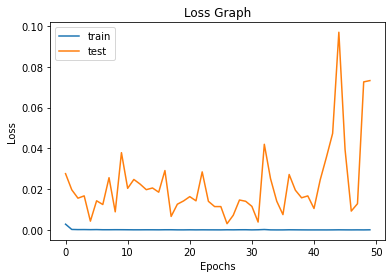

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
print(history.history.keys())
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [17]:
prediction=model.predict(testX)


In [18]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.9011909 ]
 [0.88258487]
 [0.86935705]
 [0.86792225]
 [0.8698086 ]
 [0.8880175 ]
 [0.8889645 ]
 [0.8883936 ]
 [0.88341963]
 [0.88648313]
 [0.8829518 ]
 [0.871816  ]
 [0.88066214]
 [0.8818483 ]
 [0.88517445]
 [0.88579506]
 [0.89015025]
 [0.90436023]
 [0.9088078 ]
 [0.91891426]
 [0.91739464]
 [0.9058148 ]
 [0.90447134]
 [0.92677724]
 [0.9420764 ]
 [0.9435564 ]
 [0.93833166]
 [0.9363591 ]
 [0.9356643 ]
 [0.9452249 ]
 [0.9627063 ]
 [0.9693287 ]
 [0.9538716 ]
 [0.94447726]
 [0.9378351 ]
 [0.92876613]
 [0.92600733]
 [0.9305722 ]
 [0.9458307 ]
 [0.95016706]
 [0.95533234]
 [0.9614652 ]
 [0.9564138 ]
 [0.9538308 ]
 [0.94982624]
 [0.9527441 ]
 [0.9556002 ]
 [0.9644061 ]
 [0.9666383 ]
 [0.97128826]
 [0.9781354 ]
 [0.9789825 ]
 [0.9853888 ]
 [0.99679565]
 [0.9938823 ]
 [0.9972605 ]
 [1.0029801 ]
 [1.0129918 ]
 [0.9403487 ]
 [0.92502666]
 [0.9251309 ]
 [0.939002  ]
 [0.9438495 ]
 [0.93361324]
 [0.9300651 ]
 [0.92577296]
 [0.9246864 ]
 [0.9032698 ]
 [0.89633316]
 [0.9240058 ]
 [0.9367

In [19]:
#scaler.inverse_transform(prediction)


In [20]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)


In [21]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]


In [22]:
pred

array([1150.2958, 1127.5668, 1111.4078, 1109.6552, 1111.9595, 1134.2032,
       1135.3601, 1134.6627, 1128.5865, 1132.3289, 1128.015 , 1114.4116,
       1125.218 , 1126.667 , 1130.7302, 1131.4884, 1136.8086, 1154.1674,
       1159.6005, 1171.9464, 1170.0901, 1155.9443, 1154.3031, 1181.5518,
       1200.2411, 1202.0491, 1195.6665, 1193.257 , 1192.4081, 1204.0873,
       1225.4424, 1233.5323, 1214.65  , 1203.174 , 1195.0599, 1183.9814,
       1180.6113, 1186.1877, 1204.8273, 1210.1245, 1216.4344, 1223.9263,
       1217.7555, 1214.6001, 1209.7083, 1213.2727, 1216.7616, 1227.5189,
       1230.2457, 1235.9261, 1244.2905, 1245.3253, 1253.1512, 1267.0856,
       1263.5267, 1267.6536, 1274.6405, 1286.8706, 1198.1305, 1179.4133,
       1179.5406, 1196.4855, 1202.4071, 1189.9026, 1185.5682, 1180.325 ,
       1178.9976, 1152.8353, 1144.3616, 1178.1663, 1193.6761, 1182.9955,
       1159.9431, 1166.4281, 1170.4185, 1159.7196, 1155.2306, 1157.8887,
       1139.1324, 1140.5416, 1129.4072, 1065.0265, 

In [23]:
original_copies_array = np.repeat(testY,5, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [24]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1150.2958 1127.5668 1111.4078 1109.6552 1111.9595 1134.2032 1135.3601
 1134.6627 1128.5865 1132.3289 1128.015  1114.4116 1125.218  1126.667
 1130.7302 1131.4884 1136.8086 1154.1674 1159.6005 1171.9464 1170.0901
 1155.9443 1154.3031 1181.5518 1200.2411 1202.0491 1195.6665 1193.257
 1192.4081 1204.0873 1225.4424 1233.5323 1214.65   1203.174  1195.0599
 1183.9814 1180.6113 1186.1877 1204.8273 1210.1245 1216.4344 1223.9263
 1217.7555 1214.6001 1209.7083 1213.2727 1216.7616 1227.5189 1230.2457
 1235.9261 1244.2905 1245.3253 1253.1512 1267.0856 1263.5267 1267.6536
 1274.6405 1286.8706 1198.1305 1179.4133 1179.5406 1196.4855 1202.4071
 1189.9026 1185.5682 1180.325  1178.9976 1152.8353 1144.3616 1178.1663
 1193.6761 1182.9955 1159.9431 1166.4281 1170.4185 1159.7196 1155.2306
 1157.8887 1139.1324 1140.5416 1129.4072 1065.0265 1080.1984 1072.2198
 1073.6095 1094.0973 1106.9924 1106.0997 1101.4899 1111.0758 1108.3307
 1114.8746 1124.8213 1121.6698 1129.1387 1138.1554 1132.9457 110

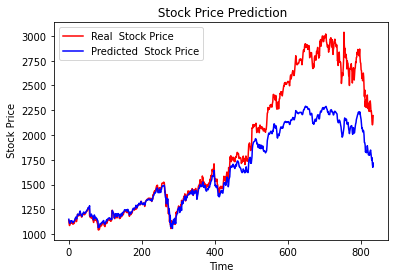

In [25]:
#plt.xlim([100,500])
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(original, pred)

330.59430240413303